# Ejercicio 4

**a)** Las variables involucradas son blablabla

**b)** Veamos los datos con un gráfico

In [1]:
datos = read.csv("/home/emiliano/EstadisticaAplicada/practica/Parasito.Peces.csv", sep = ",", head=TRUE)
attach(datos)

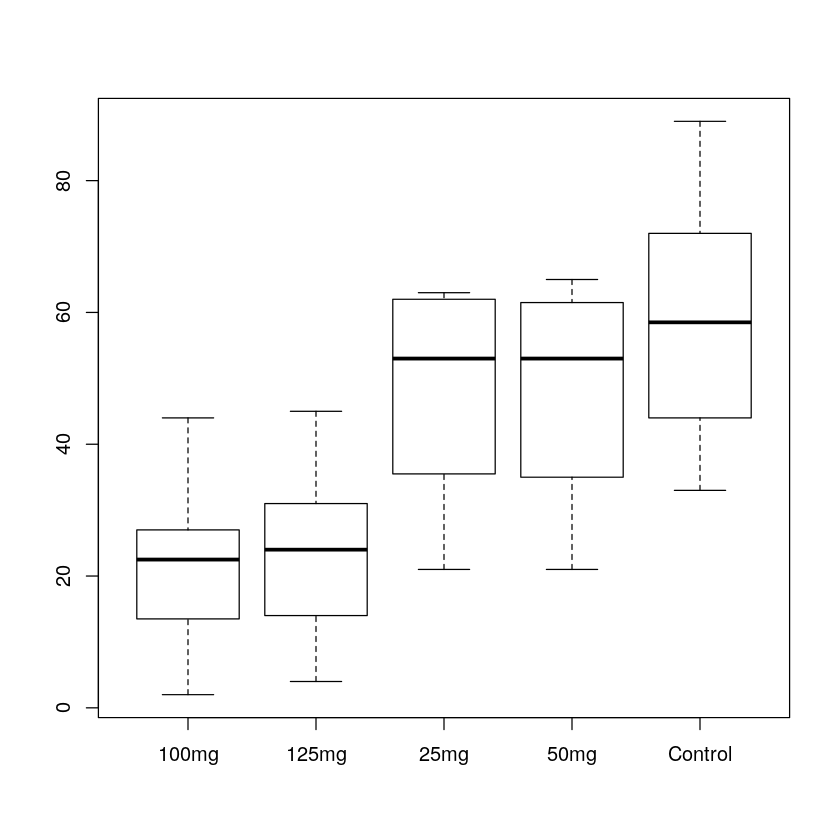

In [2]:
boxplot(Parasitos~Tratamiento)

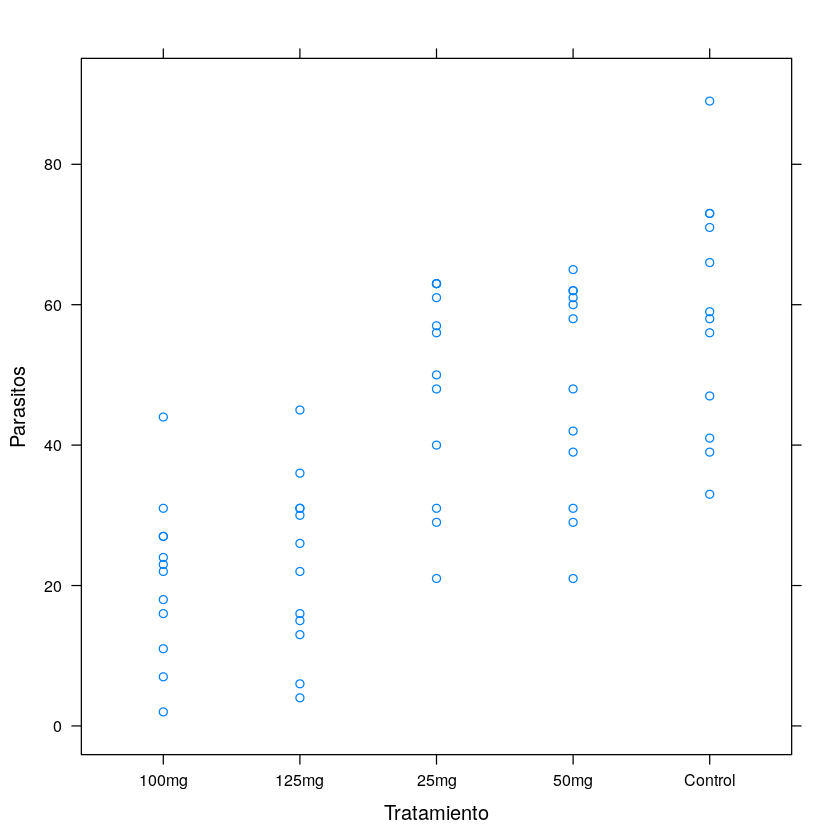

In [3]:
library(lattice)
xyplot(Parasitos~Tratamiento, data = datos)

**c)** El Modelo lo planteamos es $y_{ij}=\mu_i + \epsilon_{ij}$. Los supuestos son:

- Los $\epsilon_{ij}$ siguen una distribución normal con media cero.
- Los $\epsilon_{ij}$ son independientes entre sí.
- Los residuos de cada tratamiento tienen la misma varianza $\sigma^2$.

El test sería:

- H0: $\mu_i = \mu_j$
- H1: $\mu_i \neq \mu_j$

**d)** Utilizando ANOVA, decida si la dosis de medicamento administrado afecta a la cantidad de
parásitos en el pez. Reporte el p-valor obtenido.

In [4]:
modelo = aov(Parasitos~Tratamiento)
summary(modelo)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Tratamiento  4  13719    3430   16.89 4.36e-09 ***
Residuals   55  11170     203                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

El **p-valor** obtenido es 4.36E-9 y nos dice que rechazamos la H0.

**e)** Verificamos los supuestos,  **normalidad** (gráfico qqnorm y test shapiro) y **varianzas constantes**.

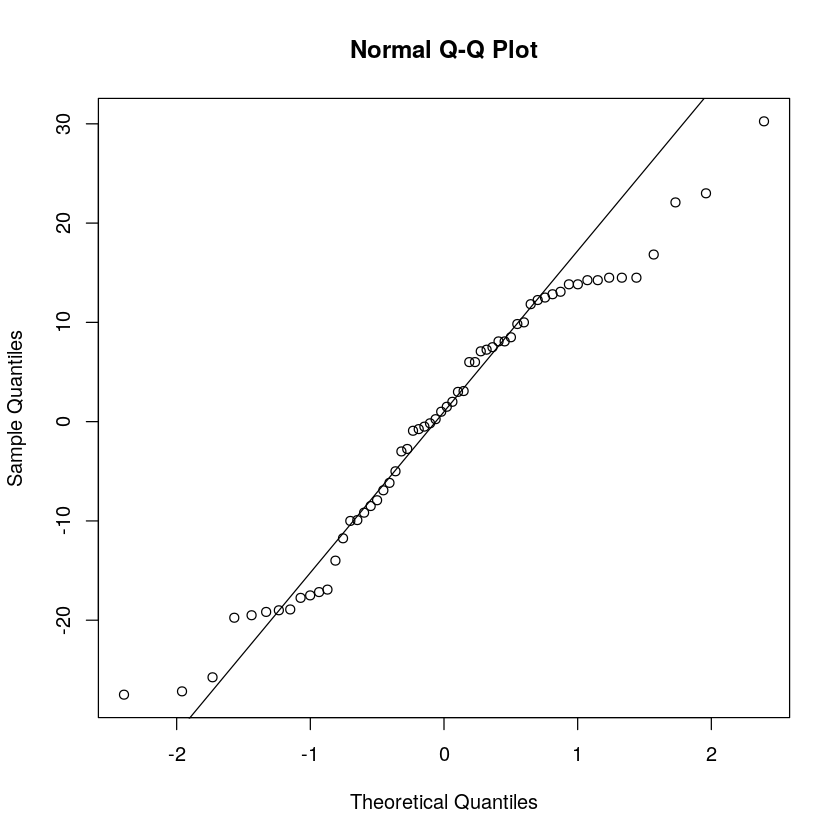

In [5]:
qqnorm(modelo$residuals)
qqline(modelo$residuals)

In [6]:
shapiro.test(modelo$residuals)


	Shapiro-Wilk normality test

data:  modelo$residuals
W = 0.96596, p-value = 0.0924


Por el pvalor de 0.0924 tomamos como que son normales los residuos (H0 aceptada). Ahora hacemos el test de levene para ver si las varianzas son iguales (H0).

In [8]:
library(car)
leveneTest(modelo)

,Df,F value,Pr(>F)
group,4,0.743935,0.566224
,55,NA,NA


Acá vemos que el pvalor es de 0.566224 entonces aceptamos H0.

**f)** NO SABEMOS, SALTEAMOS!!

**g)** Utilice comparaciones múltiples para determinar cuáles dosis de medicamento son (estadı́sticamente) efectivas en reducir la cantidad de parásitos en los peces.

In [9]:
MSE = 203
source("/home/emiliano/EstadisticaAplicada/practica/mymultcomp.R") # llamo al archivo dnd esta la funcion minHSU
minHSU(Parasitos, Tratamiento, alpha=0.05, MSE, 20)

[1] "WARNING: esta funcion considera que todos los ni son iguales"
[1] "100mg"
[1] "125mg"


[1] NA      "100mg" "125mg"